In [1]:
%run Tweet.ipynb

In [2]:
df2 = df["tweets"]
df2

0      Don’t let short term losses in Bitcoin sour yo...
1      Binance is making big moves in America. Former...
2      VeChain Is Gaining Popularity as a Dual Crypto...
3      How do the largest cryptocurrencies, such as #...
4      Every time I read something about crypto curre...
                             ...                        
395    If your interested into getting into the crypt...
396    RT @safemoon: Yeah we’re proud to rep the MOST...
397    @cryptoassetsguy They're to far down in the ho...
398    RT @kuraimichii: Reminder that if you are pros...
399    RT @Hausaa_Fulanii: Imam Dr. Bashir Umar brief...
Name: tweets, Length: 400, dtype: object

In [3]:
list_of_all_sentences = [sentence for sentence in df2]

lines = []
for sentence in list_of_all_sentences:
    words = sentence.split()
    for w in words:
        lines.append(w)

In [4]:
#Removing Punctuation

lines = [re.sub(r'[^A-Za-z0-9]+', '', x) for x in lines]

lines2 = []
listWordBanned = ["the","to","for","on","just",'how',"is","a","you","Am","Im","I","i","and","that","of","in",
                  "this","it","be","not","have","my","we","beautiful","what","no","as","host","me","with",
                 "like","your","at","do","if","too","can","know","people","about","RT","most","are"]

for word in lines:
    if word != '' and word not in listWordBanned:
        lines2.append(word)

In [5]:
#This is stemming the words to their root

# The Snowball Stemmer requires that you pass a language parameter
s_stemmer = SnowballStemmer(language='english')

stem = []
for word in lines2:
    stem.append(s_stemmer.stem(word))

In [6]:
df2 = pd.DataFrame(stem)
df2 = df2[0].value_counts()

/Users/quentinpierson/env/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


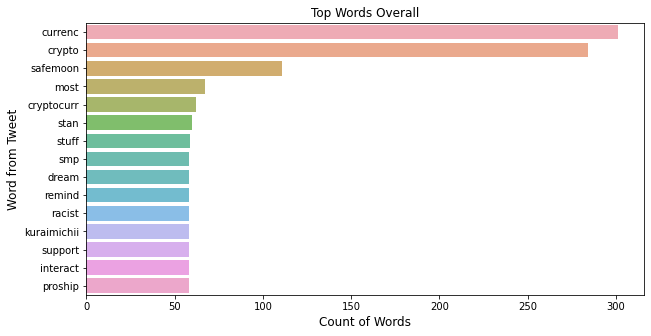

In [7]:
df2 = df2[:15]
plt.figure(figsize=(10,5))
sns.barplot(df2.values, df2.index, alpha=0.8)
plt.title('Top Words Overall')
plt.ylabel('Word from Tweet', fontsize=12)
plt.xlabel('Count of Words', fontsize=12)
plt.show()

In [13]:
import spacy
from spacy import displacy
import en_core_web_sm
nlp = en_core_web_sm.load()

In [14]:
def show_ents(doc):
    if doc.ents:
        for ent in doc.ents:
            print(ent.text + ' - ' + ent.label_ + ' - ' + str(spacy.explain(ent.label_)))

In [23]:
str1 = " " 
stem2 = str1.join(lines2)

stem2 = nlp(stem2)

label = [(X.text, X.label_) for X in stem2.ents]

df6 = pd.DataFrame(label, columns = ['Word','Entity'])

df7 = df6.where(df6['Entity'] == 'ORG')

df7 = df7['Word'].value_counts()

In [25]:
df6

,Word,Entity
0,Bitcoin,PERSON
1,Binance,PERSON
2,America,GPE
3,Brian Brooks,PERSON
4,Binance US,PERSON
...,...,...
402,Amma,PERSON
403,10,CARDINAL
404,SAFEMOON,ORG
405,Bashir Umar,PERSON


/Users/quentinpierson/env/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


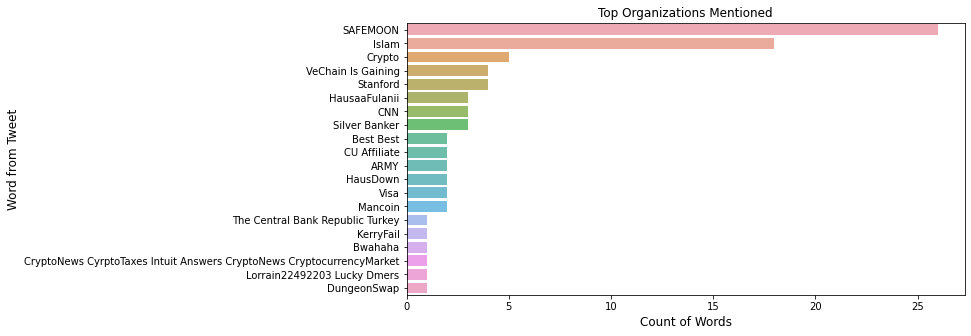

In [24]:
df = df7[:20,]
plt.figure(figsize=(10,5))
sns.barplot(df.values, df.index, alpha=0.8)
plt.title('Top Organizations Mentioned')
plt.ylabel('Word from Tweet', fontsize=12)
plt.xlabel('Count of Words', fontsize=12)
plt.show()

In [17]:
str1 = " " 
stem2 = str1.join(lines2)

stem2 = nlp(stem2)

label = [(X.text, X.label_) for X in stem2.ents]

df10 = pd.DataFrame(label, columns = ['Word','Entity'])


df10 = df10.where(df10['Entity'] == 'PERSON')

df11 = df10['Word'].value_counts()

/Users/quentinpierson/env/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


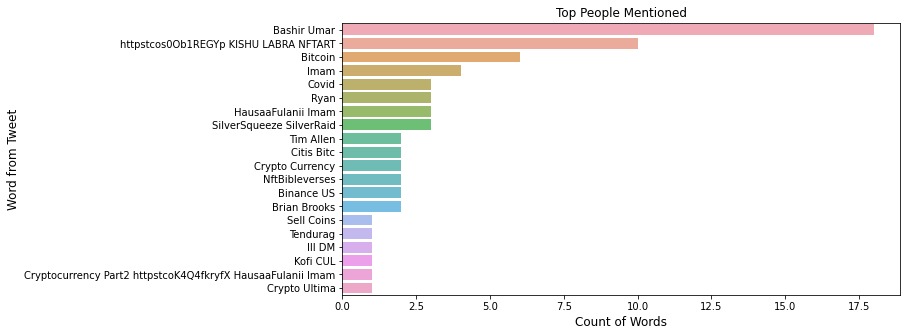

In [18]:
df = df11[:20,]
plt.figure(figsize=(10,5))
sns.barplot(df.values, df.index, alpha=0.8)
plt.title('Top People Mentioned')
plt.ylabel('Word from Tweet', fontsize=12)
plt.xlabel('Count of Words', fontsize=12)
plt.show()